In [30]:
import pandas as pd

In [31]:
dataset = pd.read_csv('retail_raw_reduced.csv')
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


In [32]:
print('Ukuran dataset : %d baris dan %d kolom\n' % dataset.shape )
print('Lima data teratas:')

Ukuran dataset : 5000 baris dan 9 kolom

Lima data teratas:


In [33]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Penjelasan Dataset
------------------

“Berikut ini tampilan data transaksi supermarket kita sepanjang tahun 2019, lengkap dengan masing-masing penjelasannya untuk tiap kolom. Bisa kita simak bersama untuk pertimbangan  strategi kita ke depan,” jelas Andra.

Aku dan teman-teman di ruangan rapat sibuk menyimak penjelasan ini:

*   **order\_id** : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
*   **order\_date** : tanggal terjadinya transaksi
*   **customer\_id** : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
*   **city** : kota tempat toko terjadinya transaksi
*   **province** : provinsi (berdasarkan city)
*   **product\_id** : ID dari suatu product yang dibeli
*   **brand** : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
*   **quantity** : Kuantitas / banyaknya product yang dibeli
*   **item\_price** : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

“Jika penjelasan data barusan sudah dapat dicerna, saya akan menampilkan Gross Merchandise Value atau total uang yang dibayarkan customer. Aksara tolong tampilkan grafiknya pada layar.”

“Oke.” Aku pun beranjak dari tempat duduk dan mengganti dokumen.



Penambahan Kolom Order Month pada Dataset
-----------------------------------------

Salah satu peserta rapat mengacungkan tangan, serta-merta aku melirik padanya begitu juga Andra, “Emangnya di data kita tadi ada info GMV ya? Gimana mau bikin grafik kalau kolomnya tidak ada?”

Aku mendapati Andra tersenyum sebelum menjawab, “Makanya, sebelum membuat grafiknya, kita pastikan dulu bahwa datanya sudah siap. Kita bisa memanfaatkan library pandas dan numpy untuk mengolah data. Bisa bantu jelaskan, Aksara?”

“Untuk membuat grafik GMV bulanan, bayangan kita tentu adalah sebuah line chart dengan sumbu-x berupa bulan, dan sumbu-y adalah total GMV di bulan tersebut. Pasti bisa,” lanjutku.

Aku tahu kalau aku dan Andra belum punya kolom bulan, baru ada order\_date yang merupakan tanggal transaksi. Tapi, tidak masalah. Aku bisa membuat kolom baru order\_month dengan kode seperti ini:

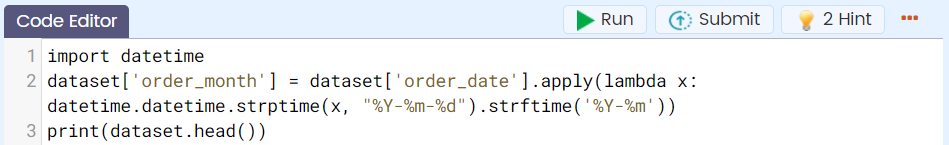

Ada beberapa function yang berperan di sini:

*   apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(**lambda** x: x\*2) berarti setiap input x di dalam kolom, akan diubah menjadi x\*2). Dalam hal ini kolom yang sudah ada adalah dataset\['order\_date'\], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
*   Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
*   Function  strftime digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

Jika berhasil dijalankan maka akan diperoleh tampilan 5 data teretas sebagai berikut

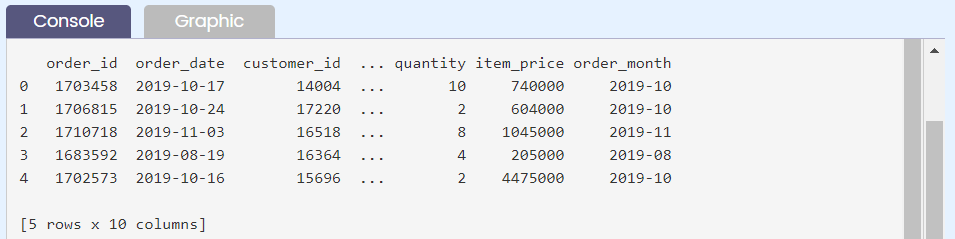



In [34]:
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


Penambahan Kolom GMV pada Dataset
---------------------------------

Selanjutnya, bagaimana dengan GMV? Definisikan GMV adalah perkalian setiap entri di kolom item\_price dan kolom quantity. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

**Code:**

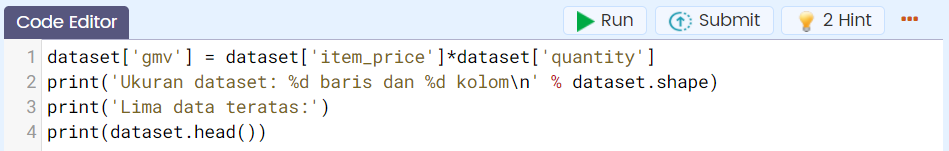

  
Jalankan kode di atas melalui tombol maka akan diperoleh hasil berikut di console

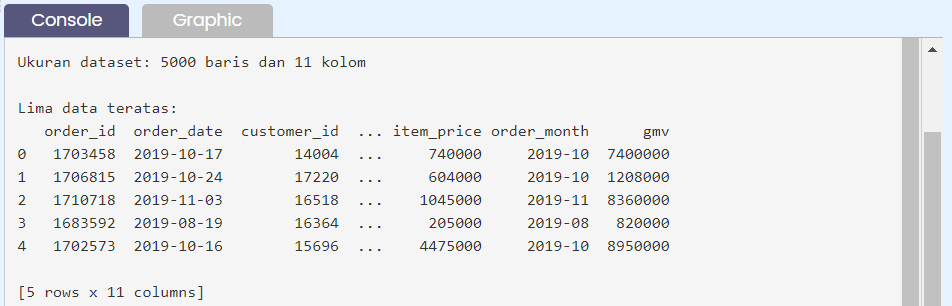

Sekarang isi dataframe menjadi seperti ini, sudah ada kolom **order\_month** dan **gmv**.

In [35]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape )
print('Lima data teratas:')

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:


In [36]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


Membuat Data Agregat
--------------------

Hasil rapat tadi mendorong divisiku untuk menampilkan plot grafik data agar lebih nyaman dilihat secara visual. Aku ingin mencoba untuk mengeksekusinya.

“Aksara, seperti yang kamu dengar juga tadi, kita perlu menampilkan datanya dalam bentuk grafik,” ujar Andra seakan tahu isi hatiku.

“Serahkan saja padaku, Ndra! Aku akan coba bikin plot grafiknya,” aku mengajukan diri.

“Baik. Kamu bisa minta tolong Senja dulu untuk menjelaskan jika ada kendala, karena hari ini saya tidak sepenuhnya di kantor.”

“Oke.” Dalam hati aku bersorak girang, sudah kangen sekali dengan Senja! Tapi sebelum itu, aku mencoba untuk mengerjakan sendiri dulu beberapa susunan kode grafiknya menggunakan matplotlib:

![](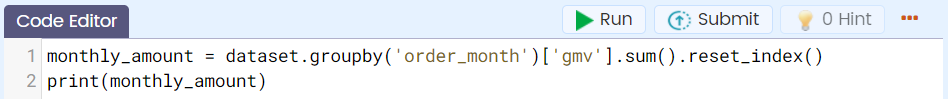 "a title")

Dengan menekan tombol  diperoleh output di consol sebagai berikut:

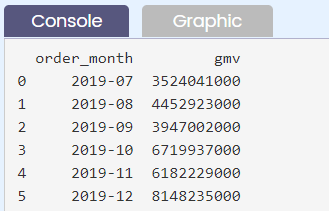


In [37]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV
------------------------------------------------------

Selanjutnya mari menggunakan matplotlib. Untuk menggunakan matplotlib, bisa memanggil library-nya seperti ini:

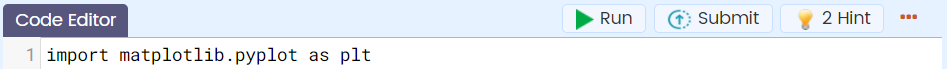

Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function plt.plot lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom order\_month di sumbu-x (parameter pertama), dan kolom gmv di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil plt.show()untuk menampilkan grafiknya.

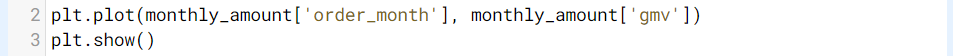

Jika berhasil dijalankan dengan menekan  diperoleh tampilan line chart-nya seperti berikut ini

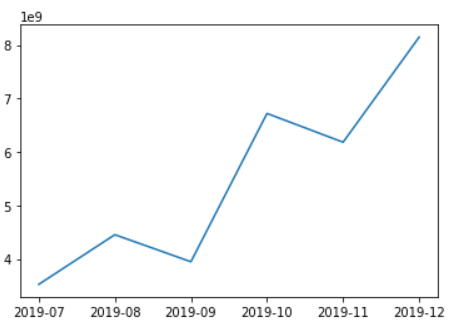


In [38]:
import matplotlib.pyplot as plt

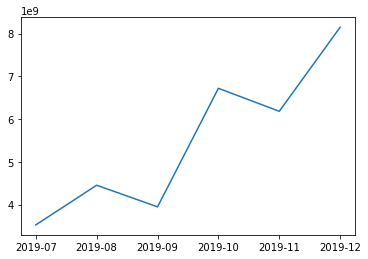

In [39]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

Cara Alternatif: Fungsi .plot() pada pandas Dataframe
-----------------------------------------------------

Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru.

Misalnya dengan code seperti ini:

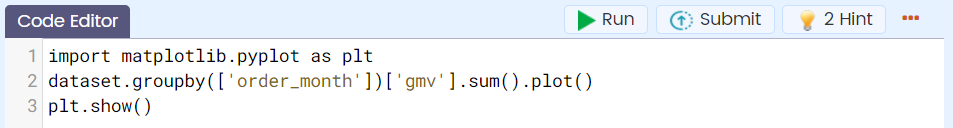

Jika dijalankan dengan menekan  akan diperoleh grafik berupa

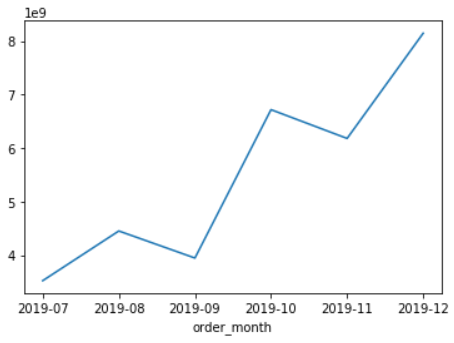

Grafik yang dihasilkan pun serupa kan?

Dengan begini, sudah bisa lihat GMV dari bulan ke bulan. Selesai deh line chart nya :)



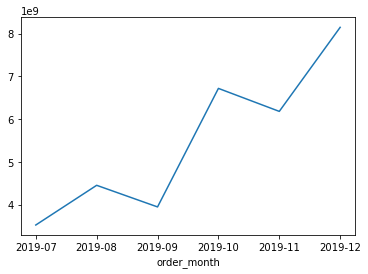

In [40]:
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Kesimpulan
----------

Di tengah pengerjaanku, aku mendengar suara celetukan dari Senja. Tampaknya Andra sudah menyampaikan pada Senja kalau hari ini aku ‘dikembalikan’ padanya.

"Sejauh ini lancar, Aksara?” tanya Senja melihatku yang masih asik menulis kode.

“Iya, nyusun kode untuk bisa jadi grafik, seru juga, Nja. Aku ada bikin catatan sih supaya enggak lupa, mau lihat?” Aku menunjukkan catatan singkatku seputar dua cara untuk membuat plot menggunakan matplotlib:

1.  Kita dapat menggunakan fungsi plt.plot() dari library matplotlib.pyplot as plt
2.  atau dengan menggunakan fungsi .plot() langsung dari variabel dataframe, yaitu dataset pada kasus kita sebelumnya. 

Dengan grafik yang sudah aku buat ini saja, sudah bisa melihat trend dan insight-nya. Untuk analisis cepat, grafik seperti ini terkadang sudah cukup.

Tapi untuk presentasi ke atasan, tentu kita harus membuat grafik yang lebih ‘cantik’.

Aku ingin memodifikasi komponen-komponen di grafik ini.



Next

* * *

  

Submit Answer

  

Anatomi dari Figure
-------------------

“Karena saya lihat kamu cukup antusias belajar visualisasi data, saya mau share insight baru, Aksara. Ini tentang kustomisasi grafik. Saya pikir ini akan membantumu mengerjakan grafik dari data hasil rapat tadi.”

Aku menggeser bangku untuk mendekatkan diri ke sebelah Senja agar bisa mendengar lebih jelas.

**“**Sebelum mulai kustomisasi, ada baiknya kita pahami dulu anatomi dari sebuah Figure di maplotlib. Bisa dilihat sesuai di gambar berikut,” jelas Senja sambil menampilkan layar berisi contoh gambar:

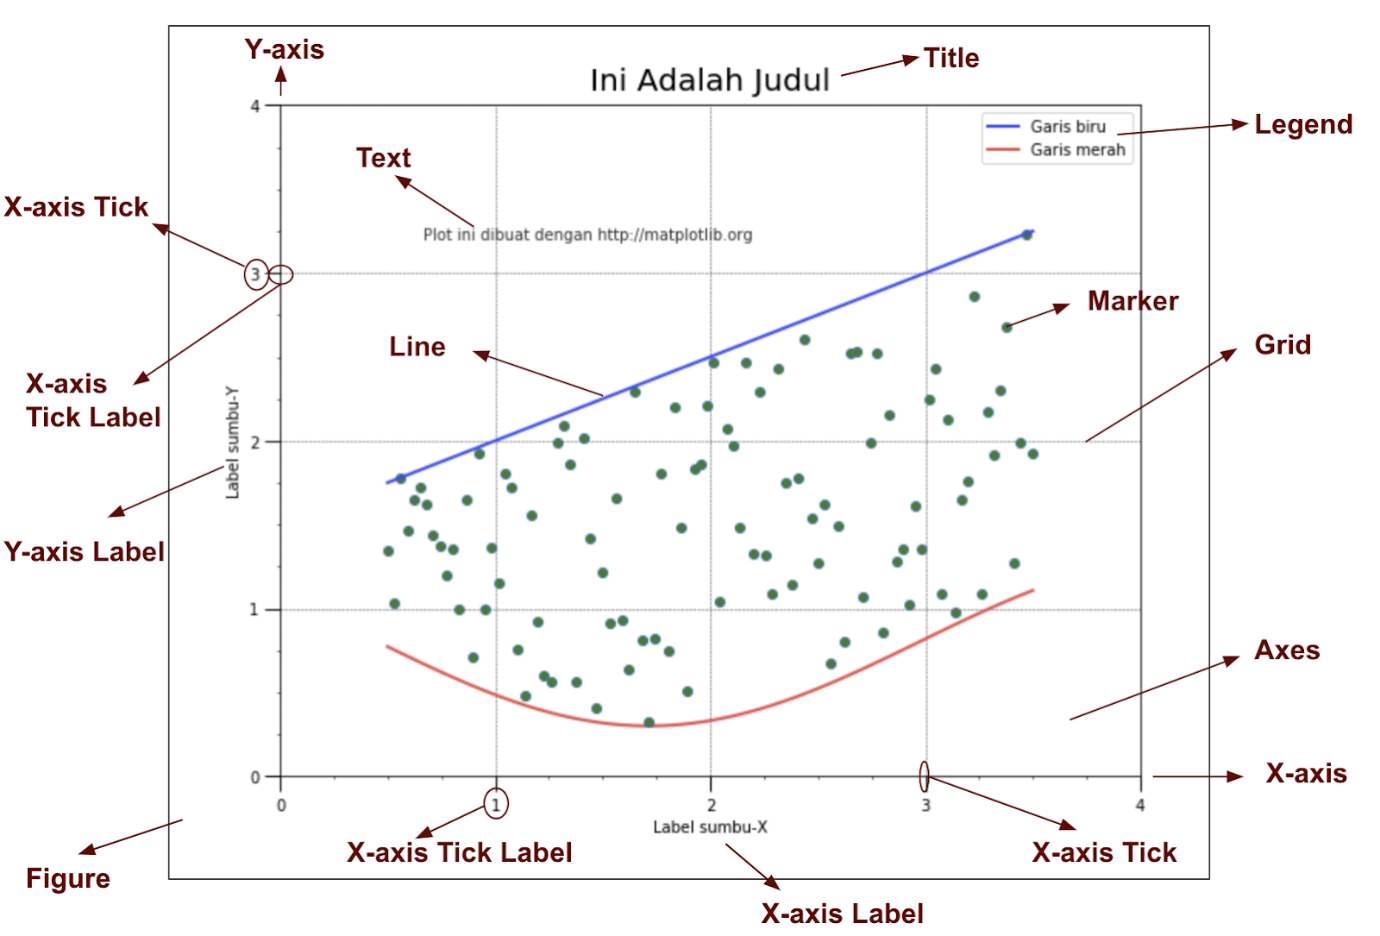

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

*   **Figure** adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
*   Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut **Axes**. Sebuah Figure bisa terdiri dari beberapa Axes. 
*   Setiap Axes biasanya memiliki sumbu-X (**X-axis**) dan sumbu-Y (**Y-axis**). Masing-masing sumbu memiliki komponen sebagai berikut:

*   **Axis Label**: Nama dari sumbu yang ditampilkan.
*   **Tick**: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
*   **Tick Label**: Tulisan di tiap tick yang menyatakan nilainya.

*   Untuk isi grafiknya sendiri, bisa berupa **line** (untuk line plot), atau **marker** (untuk scatter plot), bisa juga bentuk lain seperti **bar** (untuk bar plot / histogram).
*   Aksesoris lain yang bisa ditambahkan, di antaranya **Grid** untuk mempermudah melihat tick yang sejajar, dan **Text** untuk memberikan informasi tambahan berbentuk teks di grafik.

Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: [https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html](https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html).



Mengubah Figure Size
--------------------

“Aku sudah cukup paham. Mari kita mulai kustomisasinya. Enaknya mulai dari mana dulu ya, Nja?”

 **“**Saya suka semangat kamu. Bagaimana kalau kita ubah ukuran grafiknya dulu? Soalnya kalau ukuran grafiknya yang diubah belakangan, biasanya banyak komponen lain yang berubah bentuknya,” saran Senja.

Aku sudah bersiap mengetik kode ketika Senja menyela, “Jangan lupa untuk mengubah ukuran grafiknya.  Kamu coba dengan mengubah ukuran Figure-nya, Aksara. Caranya, sebelum mulai membuat plot, kita tambahkan kode berikut sebelum melakukan plotting grafik.”



Jika keseluruhan kode pada code editor dengan benar ditulis dan diekskusi dengan  maka diperoleh hasil berupa:

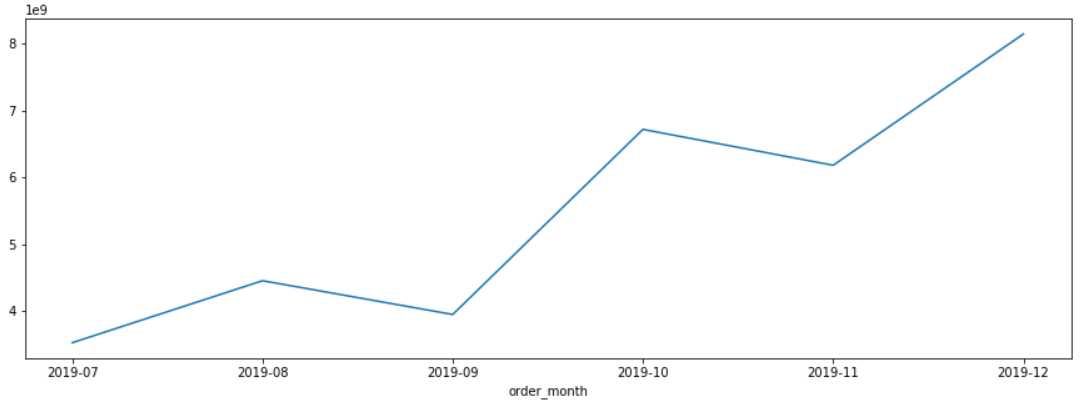

Dalam contoh ini, ukuran Figure telah diubah agar memiliki panjang 15 inch, dan lebar 5 inch. Sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya.



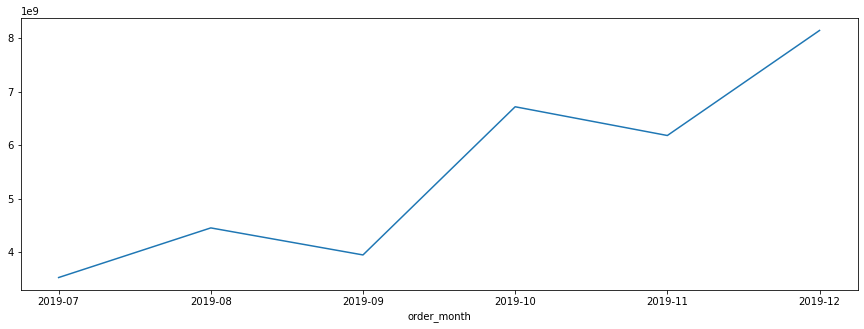

In [41]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Kustomisasi Title and Axis Labels
---------------------------------

“Itu kan untuk menambahkan, lalu bagaimana caranya untuk kustomisasi, Nja?” tanyaku antusias.

“Kita bisa melakukan berbagai modifikasi dengan menambahkan parameter ke dalam function-nya. Begini yah, saya kasih contoh,” aku paling suka kalau Senja sudah mulai memberi contoh-contoh. Jadi semakin jelas dan mudah dimengerti.

Misalnya, untuk judul/title, parameter yang bisa ditambahkan:

*   **loc**: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
*   **pad**: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
*   **fontsize**: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
*   **color**: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.

Mari modifikasi judul, xlabel, dan ylabel dengan parameter-parameter di atas, misalnya seperti ini:

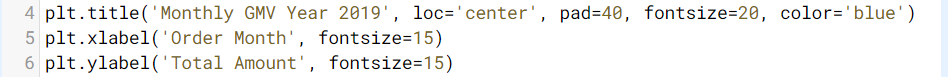

Jika dieksekusi kode yang telah selesai dituliskan pada code editor dengan , maka diperoleh output grafik berupa

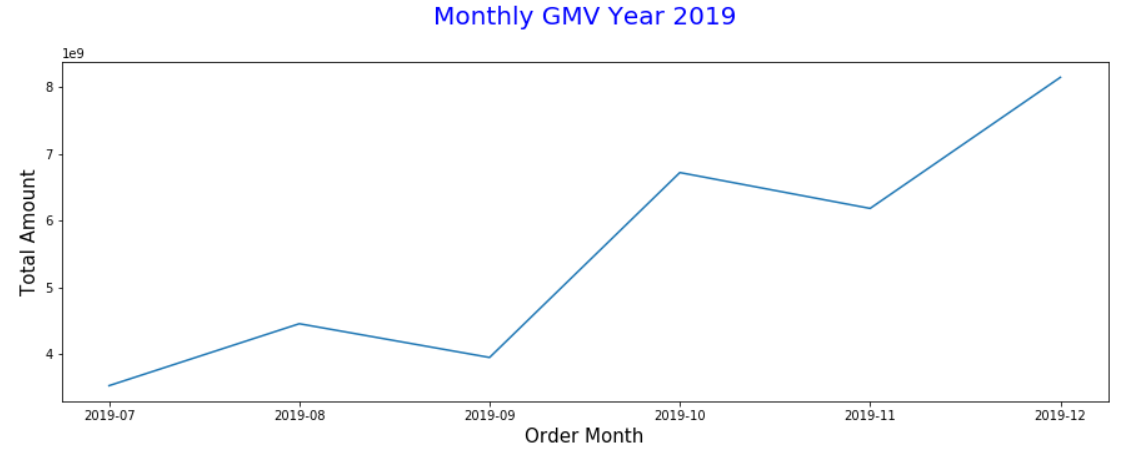

Bisa dilihat bahwa judulnya sekarang menjadi lebih besar, agak berjarak ke atas, dan berwarna biru. Label di sumbu x maupun y juga menjadi lebih besar dari sebelumnya.


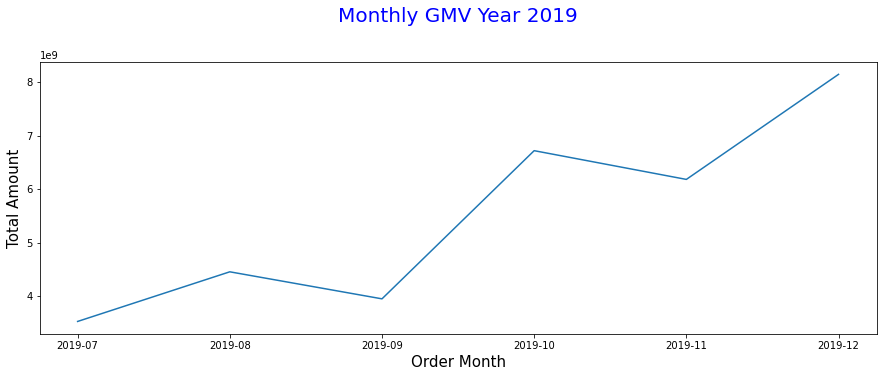

In [42]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Kustomisasi Line dan Point
--------------------------

“Ini garis charts-nya enggak harus warna standar kok, Aksara. Bisa kamu ganti, tahu kan caranya?” komentar Senja saat melihat charts yang kutampilkan.

“Oke, biar lebih menarik juga ya. Caranya seperti ini bukan?” Aku menunjukkan cara dan detailnya untuk memastikan:

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:

*   **color**: mengubah warnanya (sama seperti di title)
*   **linewidth**: mengubah ketebalan line/garisnya (dalam satuan px)
*   **linestyle**: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
*   **marker**: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘\*’.

Misalnya ingin ubah grafiknya menjadi seperti ini:

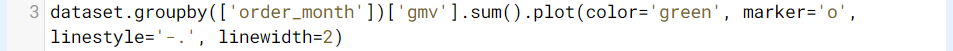

Jika telah selesai dikustomisasi line dan pointnya, jalankan dengan  dan diperoleh output grafik berupa:

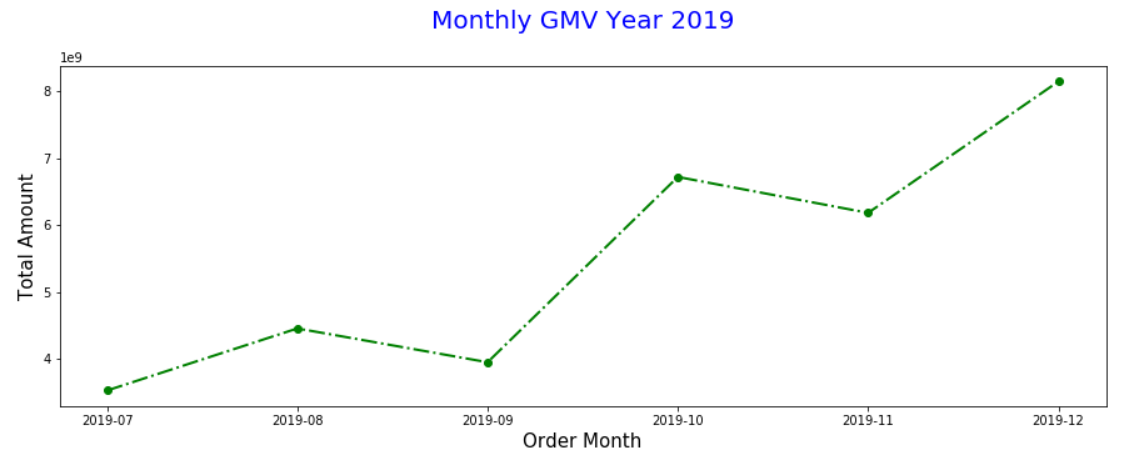




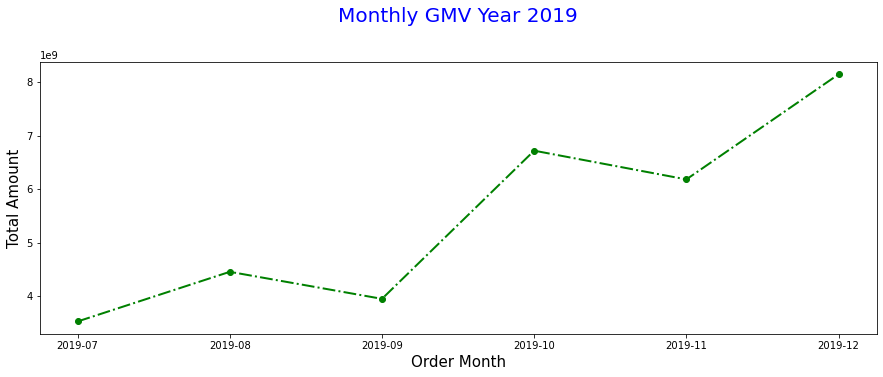

In [43]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

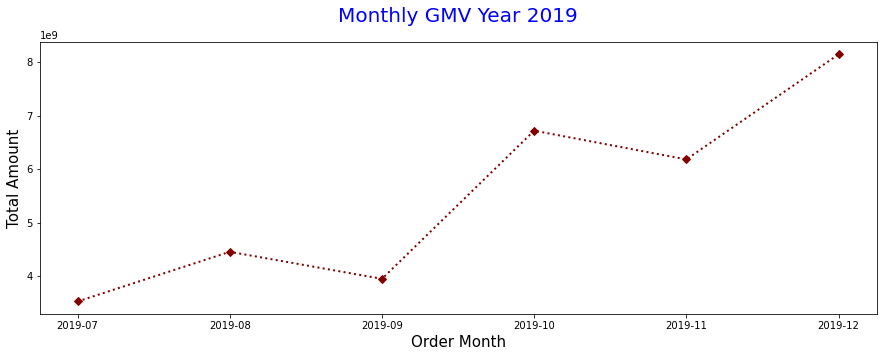

In [44]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='maroon', marker='D', linestyle=':', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20,  color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

Kustomisasi Grid
----------------

“Nah, kamu sudah paham soal mengubah warna garis chart. Ini saya mau kasih tahu kamu soal kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan grid. Sini saya jelaskan,” lanjut Senja. Aku diam memperhatikan:

Caranya dengan menambahkan plt.grid() dengan parameter yang mirip dengan line. Contohnya di sini:



Jika telah selesai dikustomisasi gridnya dan kemudian dijalankan dengan , maka tampilan grafik yang diperoleh adalah 

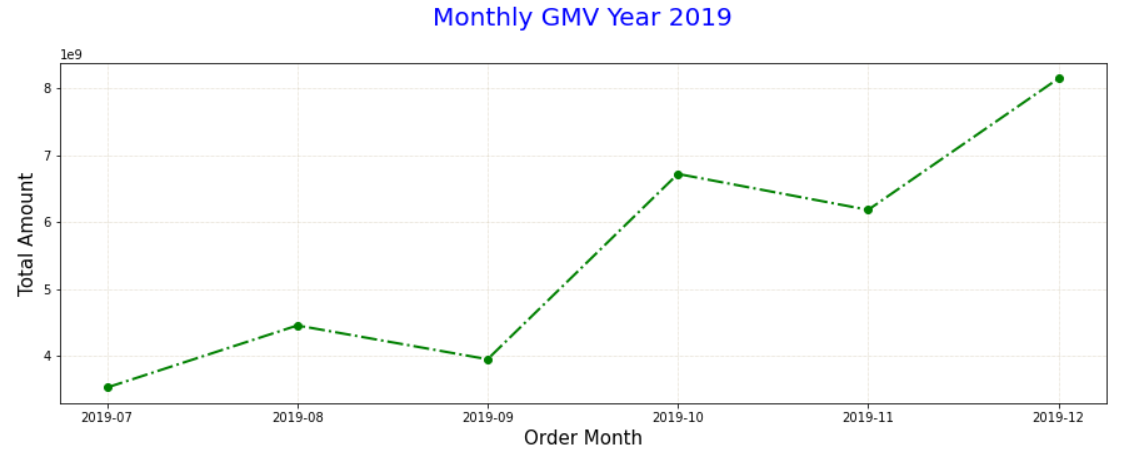



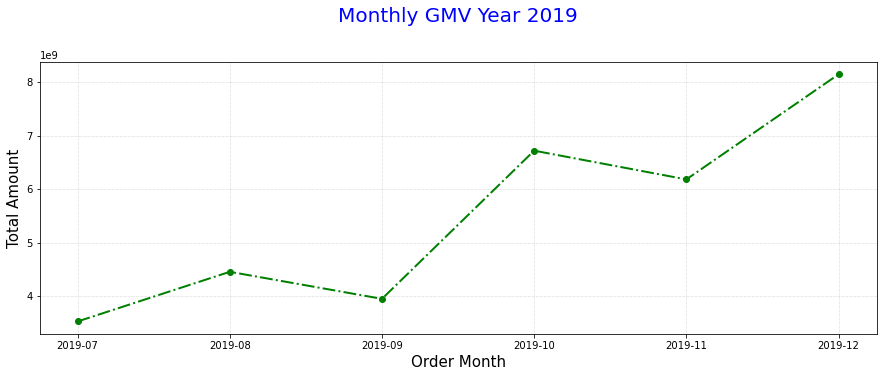

In [45]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

Kustomisasi Axis Ticks
----------------------

“Bagaimana, apakah sudah cukup grafiknya seperti ini, Nja?” tanyaku setelah melakukan praktik atas penjelasan-penjelasan Senja tadi.

“Sepertinya ada yang belum tepat. Ini titik-titik di sumbu y, nilainya masih aneh. 2.0, 2.5, 3.0 dsb lalu di atasnya 1e11. Kayaknya bisa dibuat lebih jelas lagi. Buat saja dalam bentuk miliar agar lebih mudah dipahami."

Aku pun mencoba saran dari Senja: **Nilai-nilai di sumbu x dan y bisa diakses melalui function plt.xticks() dan plt.yticks().**

Untuk mengubah ticks di sumbu-y menjadi milyar, bisa menambahkan code sebagai berikut:

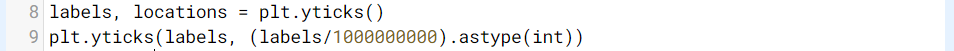

Jika telah diselesaikan penulisan kodenya dan dijalankan dengan , diperoleh tampilan grafik berikut ini

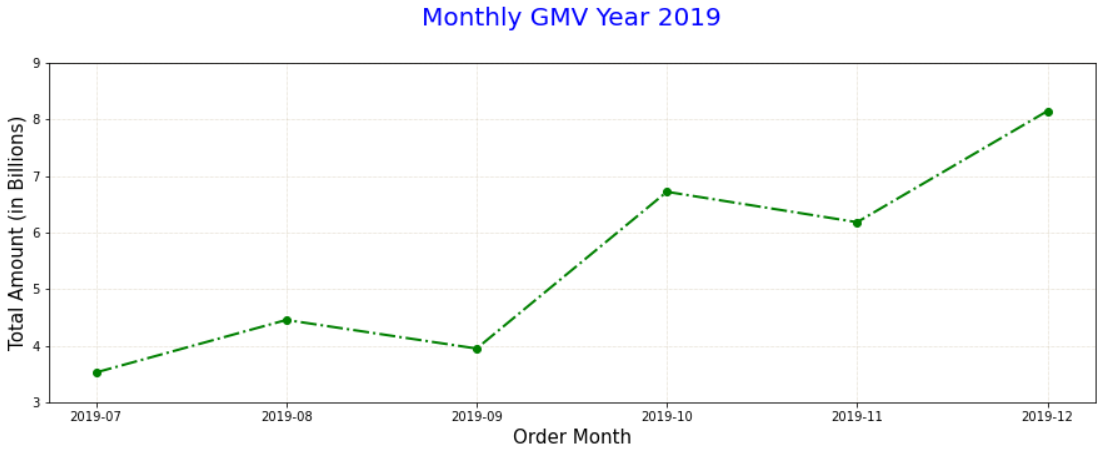

Dapat dilihat bahwa plt.ticks() yang sebelumnya, digantikan dengan nilai baru yaitu nilai awal dibagi dengan 1 milyar (1000000000).





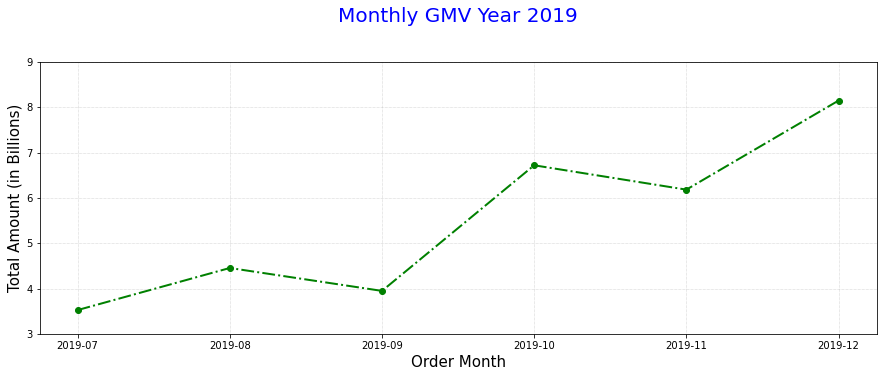

In [48]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Menentukan Batas Minimum dan Maksimum Axis Ticks
------------------------------------------------

Aku pun kembali menyerahkan hasil kerjaku untuk ditinjau Senja sebelum kuberikan pada Andra. Tapi, ternyata masih ada kekurangan. Ia pun menulis sebuah catatan untuk ditempel di keyboard laptopku:

Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan plt.ylim(ymin=0) seperti ini:



Jika dijalankan kode yang telah ditulis pada code editor dengan , berikut ditampilkan kustomisasi batas sumbu y -nya:

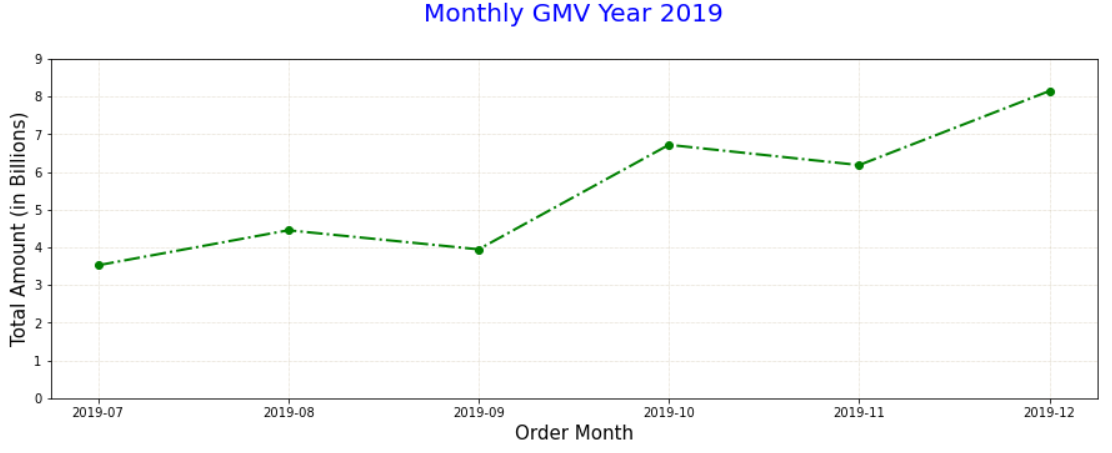

Untuk mengatur batas maksium, kita tambahkan juga parameter ymax, tetapi sepertinya di sini tidak perlu. Kita juga bisa mengatur batas minimum dan maksimum sumbu-x dengan function plt.xlim.

Aku mulai mengoreksi kodeku sesuai catatan Senja. “ Nah, gimana kalau sekarang, Nja? Menurutku sudah lebih baik dan menarik. Untuk ticks di sumbu-x nya bagaimana? Perlu diapakan?”

Senja melirikku penuh arti. “Sudah baik. Good job, Aksara!”

Ah, akhirnya setelah banyaknya revisi!






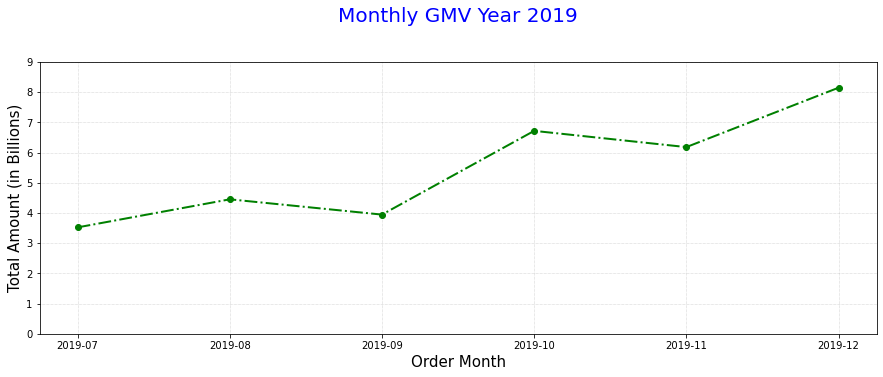

In [51]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Menambahkan Informasi Pada Plot
-------------------------------

“Berhubung grafiknya sudah jadi, Aksara. Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan _insight_ dari grafik tersebut. Menurutmu?”

“Boleh juga. Bagusnya kita tambahkan insight apa ya?”

  
  
“Dilihat dari trend-nya, mulai bulan Oktober 2019, GMV kita naik drastis setelah sebelumnya stagnan di angka 200-300 milyar per bulan. Kita bisa mulai dengan menambahkan info ini di grafik. Caranya seperti ini,” jelas Senja.

Caranya dengan menambahkan plt.text seperti potongan kode program berikut ini:

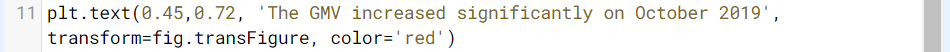

Jika keseluruhan kode dijalankan dengan  diperoleh tampilan grafik seperti berikut ini

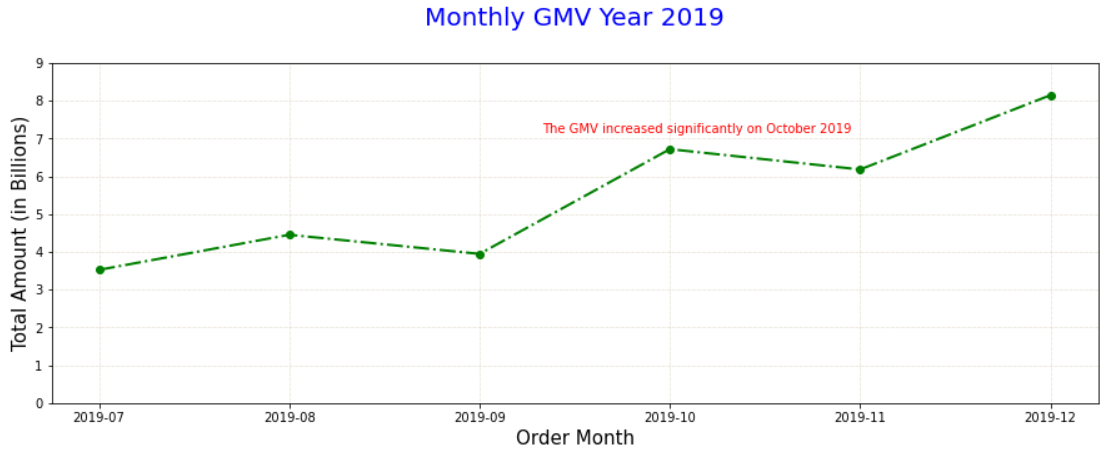

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan plt.text. Dua angka pertama itu adalah koordinat, x dan y. Saat set transform=fig.transFigure, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.



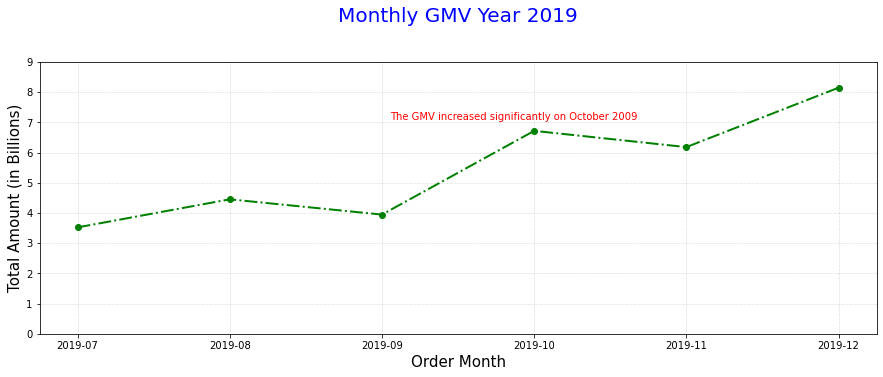

In [53]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2009', transform=fig.transFigure, color='red')
plt.show()

Menyimpan Hasil Plot Menjadi File Image
---------------------------------------

“Nja, ini sudah aku tambahkan informasi tadi. Dariku sih sudah siap kalau mau dibawa ke rapat atau dilaporkan ke Andra. Oh ya, ini aku mau simpan sebagai file gambar, gimana caranya ya?”

Aku menunggu jawaban Senja. Ia masih melihat-lihat susunan kode dan tampilan grafikku. “Oke, ini sudah layak untuk dipresentasikan. Untuk menyimpan sebagai file gambar, kalau mau cepat, bisa tinggal di-_screenshoot_ saja. Tapi kalau ingin hasil yang bagus, ada trik tersendiri,” ujar Senja sengaja membuatku penasaran.

“Nih sini saya ajarkan. Kita bisa menyimpan sebagai file gambar dengan _function_ **savefig** sebelum plt.show(), seperti ini:



atau secara lengkapnya untuk kasus bahasan kita

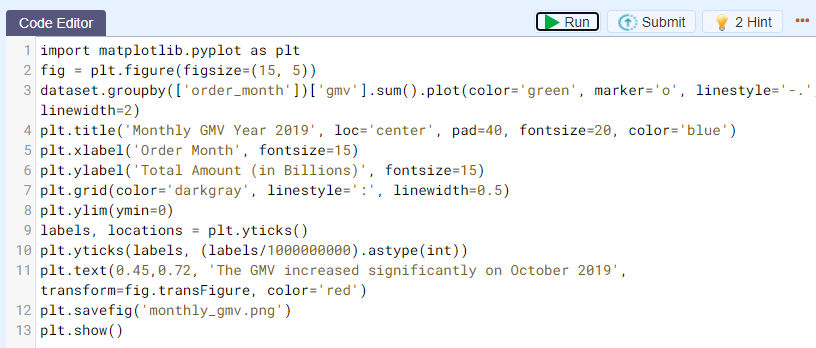

Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

plt.gcf().canvas.get\_supported\_filetypes()

dengan outputnya menunjukkan ke dalam tipe file apa saja dapat disimpan 

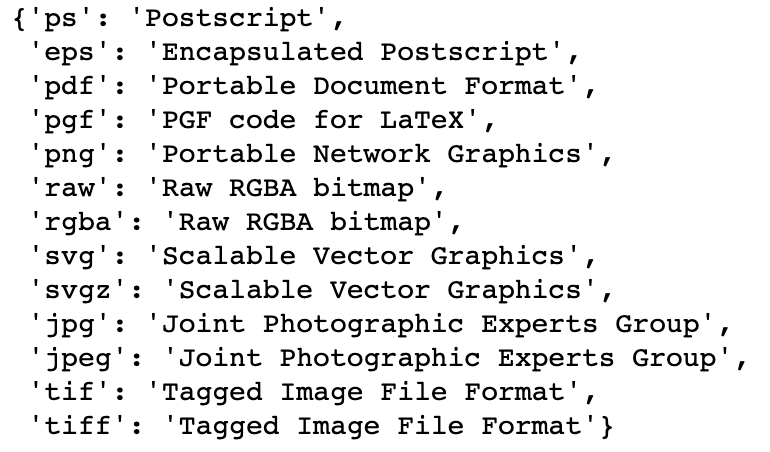

Senja pun menjelaskan sambil menunjukkan tampilan coding nya.


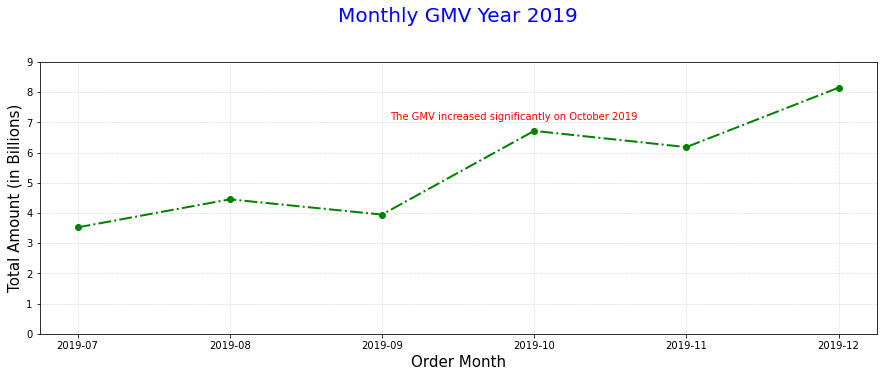

In [54]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

Pengaturan Parameter untuk Menyimpan Gambar
-------------------------------------------

“Satu lagi, Aksara. Ini bisa kamu atur juga resolusinya agar hasil gambarnya lebih berkualitas. Ini kamu inget deh beberapa parameternya. Saya bikinkan note saja,” tambah Senja.

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

*   **dpi:** Resolusi gambar (dots per inch). 
*   **quality:** Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
*   **facecolor:** Memberikan warna bagian depan figure, di luar area plot 
*   **edgecolor:** Memberikan warna pinggiran gambar
*   **transparent:** Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

Jadi, coba disimpan dengan settingan seperti ini ya:



atau secara lengkapnya untuk kasus bahasan ini :

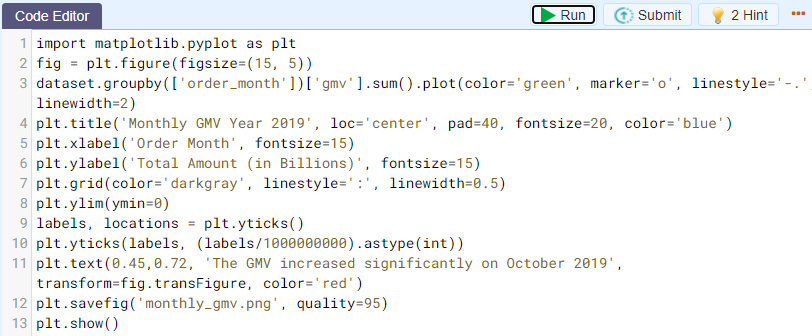

Yang akan menghasilkan kualitas gambar yang tersimpan sebesar 95% dari awal.



<ipython-input-55-a97196acd525>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('monthly_gmv.png', quality=95)


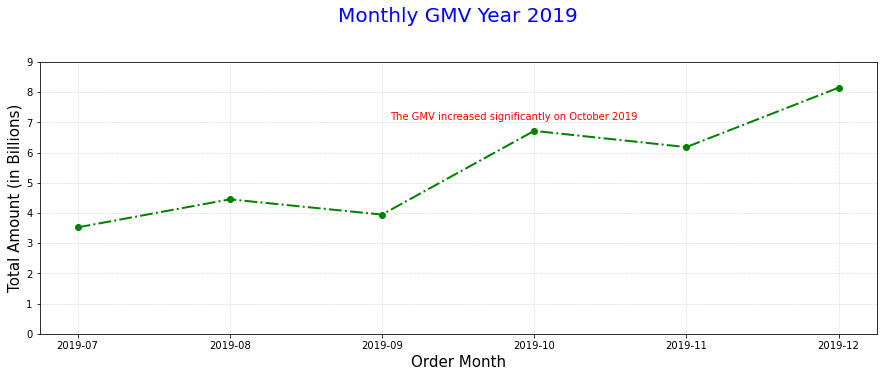

In [55]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

Studi Kasus dari Senja: Daily number of customers on Desember
-------------------------------------------------------------

Dengan menggunakan dataset yang sama ('**https://storage.googleapis.com/dqlab-dataset/retail\_raw\_reduced.csv**'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan **jumlah pembeli harian (daily number of customers) selama bulan Desember.**

Beberapa spesifikasi yang harus diperhatikan:

*   Ukuran figure adalah 10x5
*   Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
*   Sumbu-y adalah jumlah unique customers di tiap tanggal
*   Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

Jika berhasil kodenya dibuat dan dijalankan dengan  diperoleh grafik seperti berikut ini 

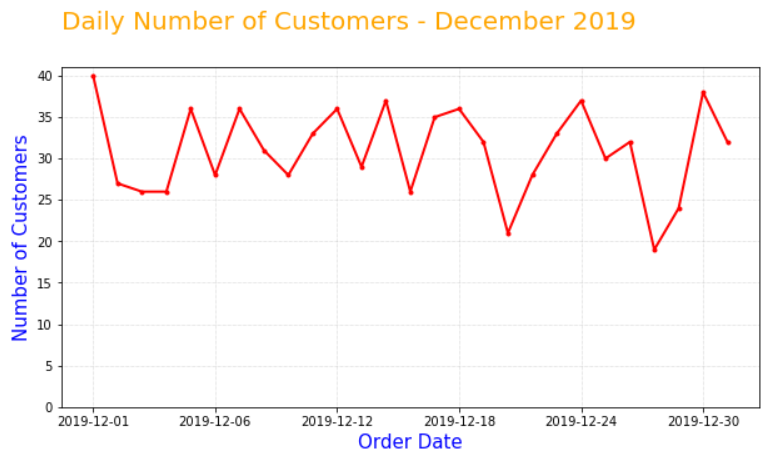


In [58]:
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


In [59]:
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


In [61]:
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


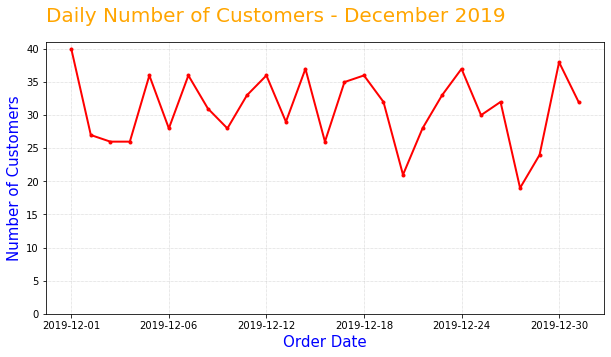

In [85]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()